<a href="https://colab.research.google.com/github/Lizethmurcia29/TIC_lizeth/blob/main/Copia_de_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Retos:


*   Realizar un modelo de predección con los datos orginales ¿Cuál es su error cuadrático medio?
*   Une los datos originales y simulados, realiza un modelo de predección con los datos simulados ¿Cuál es su error cuadrático medio?
*   ¿Los datos simulados realizaron alguna contribución?

## Métodos de Monte-Carlo
Los Métodos de Monte-Carlo son técnicas para analizar fenómenos por medio de algoritmos computacionales, que utilizan y dependen fundamentalmente de la generación de números aleatorios. El término Monte-Carlo, hace referencia al casino de Montecarlo, una de las capitales de los juegos de azar; y se utilizó como denominación para estás técnicas por la aleatoriedad inherente que poseen. El estudio de los Métodos de Monte-Carlo requiere un conocimiento detallado en una amplia gama de campos; por ejemplo, la probabilidad para describir los experimentos y procesos aleatorios, la estadística para analizar los datos, las ciencias de la computación para implementar eficientemente los algoritmos y la programación matemática para formular y resolver problemas de optimización.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import yfinance as yf
np.random.seed(1984)
%matplotlib inline
import pandas_datareader as dr
from datetime import date, datetime, timedelta
plt.style.use("ggplot")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [7]:
# Utilizando random para genera números aleatorios.
import random
random.seed(1984) # semilla para replicar la aleatoriedad
random.random() # primer llamado a random

0.36352835585530807

In [8]:
random.random() # segundo llamado a random

0.49420568181919666

In [9]:
for i in range(6):
    print(random.random()) # 5 números aleatorios

0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343
0.24405748180364206


In [10]:
# volviendo a llamar a seed para replicar el mismo resultado aleatorio.
random.seed(1984)
for i in range(7):
    print(random.random()) # Mismos resultados que arriba.

0.36352835585530807
0.49420568181919666
0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343


Los Métodos de Monte-Carlo se basan en la analogía entre probabilidad y volumen. Las matemáticas de las medidas formalizan la noción intuitiva de probabilidad, asociando un evento con un conjunto de resultados y definiendo que la probabilidad del evento será el volumen o medida relativa del universo de posibles resultados. Monte-Carlo usa esta identidad a la inversa, calculando el volumen de un conjunto interpretando el volumen como una probabilidad. En el caso más simple, esto significa muestrear aleatoriamente un universo de resultados posibles y tomar la fracción de muestras aleatorias que caen en un conjunto dado como una estimación del volumen del conjunto. La ley de grandes números asegura que esta estimación converja al valor correcto a medida que aumenta el número de muestras. El teorema del límite central proporciona información sobre la magnitud del probable error en la estimación después de un número finito de muestras. En esencia podemos decir que el Método de Monte-Carlo consiste en calcular o aproximar ciertas expresiones a través de adivinarlas con la ayuda de dibujar una cantidad normalmente grande de números aleatorios. Veamos como funciona con un ejemplo, calculemos el área de un círculo de radio 1; lo que es lo mismo a decir que aproximemos el valor de π
.

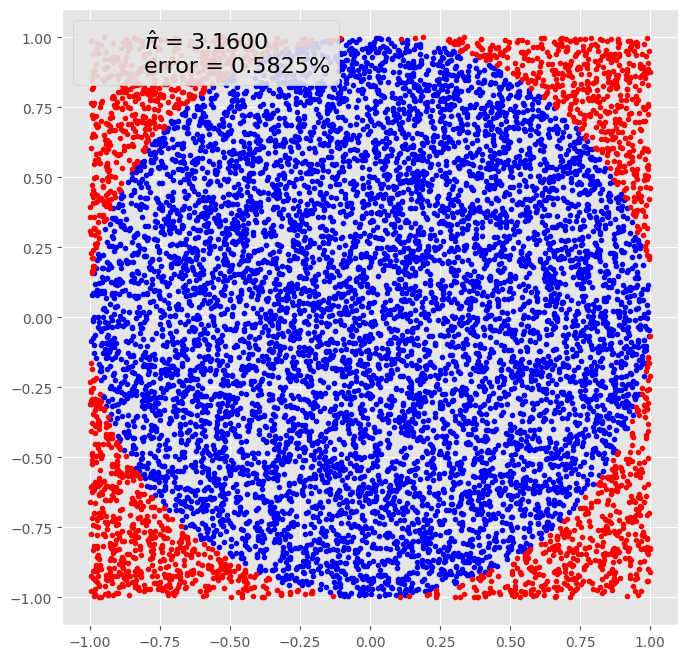

In [53]:
# Ejemplo: Aproximando el valor de pi - área de un círculo de
# radio = 1.
#ENCUENTRA UNA APROXIMACIÓN A PI
def mc_pi_aprox(N=10000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

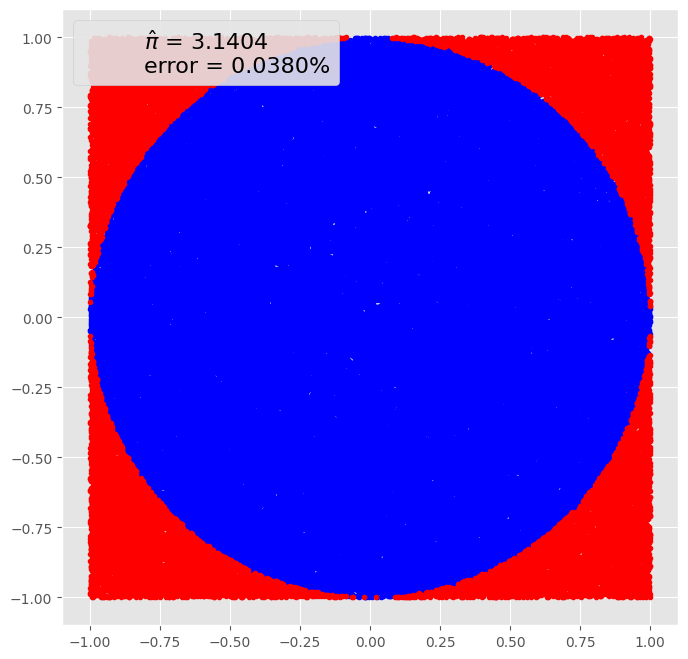

In [54]:
# con 1000000 experimentos
mc_pi_aprox(N=100000)

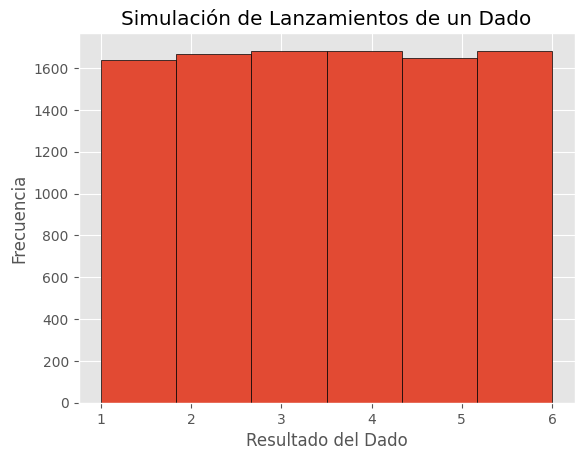

In [11]:
# Simulación de lanzamiento de un dado 10,000 veces
resultados = np.random.randint(1, 7, 10000)

# Visualización de resultados
plt.hist(resultados, bins=6, edgecolor='black')
plt.title('Simulación de Lanzamientos de un Dado')
plt.xlabel('Resultado del Dado')
plt.ylabel('Frecuencia')
plt.show()

## Simulación en acciones

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


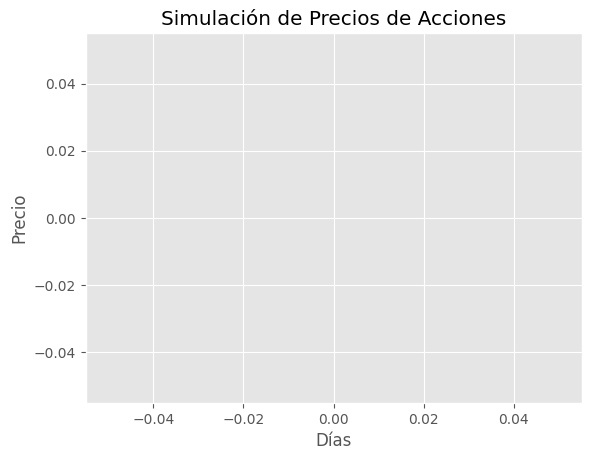

In [12]:
# Descargar datos de una acción
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
precios = data['Adj Close'].values

# Simular trayectorias de precios usando Monte Carlo
S0 = precios[-1]  # Precio inicial
T = 252  # Días en un año
mu = np.mean(np.diff(np.log(precios)))  # Rentabilidad media
sigma = np.std(np.diff(np.log(precios)))  # Volatilidad
n_simulaciones = 1000  # Número de simulaciones
trayectorias = np.zeros((T, n_simulaciones))

for i in range(n_simulaciones):
    trayectorias[:, i] = S0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) + sigma * np.random.normal(size=T)))

# Visualizar algunas trayectorias
for i in range(10):
    plt.plot(trayectorias[:, i])

plt.title('Simulación de Precios de Acciones')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.show()

## Aplicación con dataset
# Consumo de energía eléctrica en hogares individuales
Mediciones del consumo de energía eléctrica en un hogar con una frecuencia de muestreo de un minuto durante un período de casi 4 años. Se encuentran disponibles diferentes magnitudes eléctricas y algunos valores de submedición.

In [14]:
# abrir el archivo
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)
print(df.head())

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [15]:
# Limpiar los datos y seleccionar una variable de interés (Global_active_power)
# Filtramos los datos no disponibles
df = df.dropna(subset=['Global_active_power'])

In [16]:
# Convertimos Global_active_power a float
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
globalpower = df['Global_active_power']

In [17]:
# convertir date a tipo fecha
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

<ipython-input-17-eefccd715a08>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [18]:
# tipo de dato que es date
print(df['Date'].dtype)

datetime64[ns]


In [19]:
# agrupar por día
daily_data = df.groupby(df['Date'].dt.date)['Global_active_power'].sum()
print(daily_data.head())

Date
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Name: Global_active_power, dtype: float64


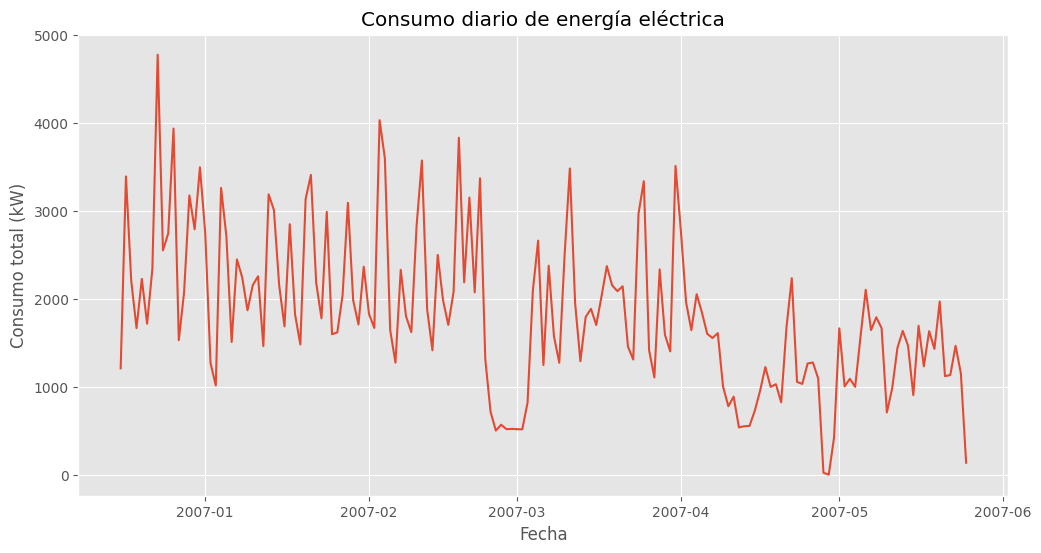

In [20]:
# prompt: graficar daily_data
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values)
plt.title('Consumo diario de energía eléctrica')
plt.xlabel('Fecha')
plt.ylabel('Consumo total (kW)')
plt.grid(True)
plt.show()

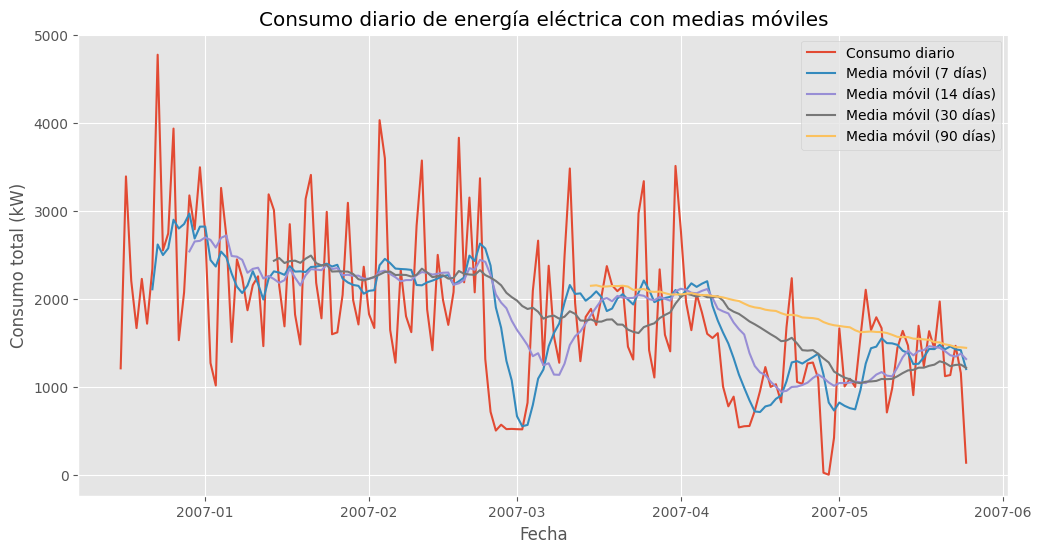

In [21]:
# calcular la media movil ideal
# Calcular la media móvil con diferentes ventanas
window_sizes = [7, 14, 30, 90]  # Diferentes tamaños de ventana para la media móvil
rolling_means = {}

for window_size in window_sizes:
    rolling_means[window_size] = daily_data.rolling(window=window_size).mean()

# Visualizar las medias móviles
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values, label='Consumo diario')

for window_size, rolling_mean in rolling_means.items():
    plt.plot(daily_data.index, rolling_mean.values, label=f'Media móvil ({window_size} días)')

plt.title('Consumo diario de energía eléctrica con medias móviles')
plt.xlabel('Fecha')
plt.ylabel('Consumo total (kW)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# selecciona la mejor media movil menor a 90 respecto al error cuadratico
from sklearn.metrics import mean_squared_error

# Calcular el error cuadrático medio para cada media móvil
errors = {}
for window_size, rolling_mean in rolling_means.items():
  if window_size < 90:
    # Asegurarse de que los datos tengan el mismo tamaño
    valid_indices = rolling_mean.notna()
    rmse = mean_squared_error(daily_data[valid_indices], rolling_mean[valid_indices], squared=False)
    errors[window_size] = rmse

# Encontrar la media móvil con el menor error
best_window_size = min(errors, key=errors.get)
print(f"La mejor media móvil (menor a 90 días) con respecto al error cuadrático es de {best_window_size} días.")

La mejor media móvil (menor a 90 días) con respecto al error cuadrático es de 7 días.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
# Hacer media móvil para n = 7
n = 7
k = len(daily_data.values)
mmovil = np.empty(k)
mmovil[:] = np.nan
ini = 0
for i in range(n-1,k):
  mmovil[i] = np.sum(daily_data.values[ini:i+1])/n
  ini += 1
mmovil

array([          nan,           nan,           nan,           nan,
                 nan,           nan, 2107.62371429, 2616.79657143,
       2496.73257143, 2573.77457143, 2897.76257143, 2798.19285714,
       2849.052     , 2968.05971429, 2684.61914286, 2819.50257143,
       2820.34314286, 2439.64685714, 2366.11742857, 2535.65657143,
       2469.79542857, 2286.80628571, 2137.29542857, 2064.77485714,
       2150.46314286, 2313.42685714, 2169.96714286, 1991.10028571,
       2230.87685714, 2310.90485714, 2297.66457143, 2271.57171429,
       2370.55571429, 2308.594     , 2311.32885714, 2303.74571429,
       2360.80942857, 2365.35457143, 2378.38828571, 2398.412     ,
       2366.25228571, 2385.89971429, 2230.234     , 2184.94      ,
       2156.67857143, 2146.70114286, 2057.54371429, 2090.17457143,
       2097.28371429, 2380.948     , 2453.196     , 2404.99828571,
       2342.95285714, 2337.848     , 2334.51285714, 2327.72171429,
       2156.23685714, 2152.70657143, 2185.89657143, 2206.04885

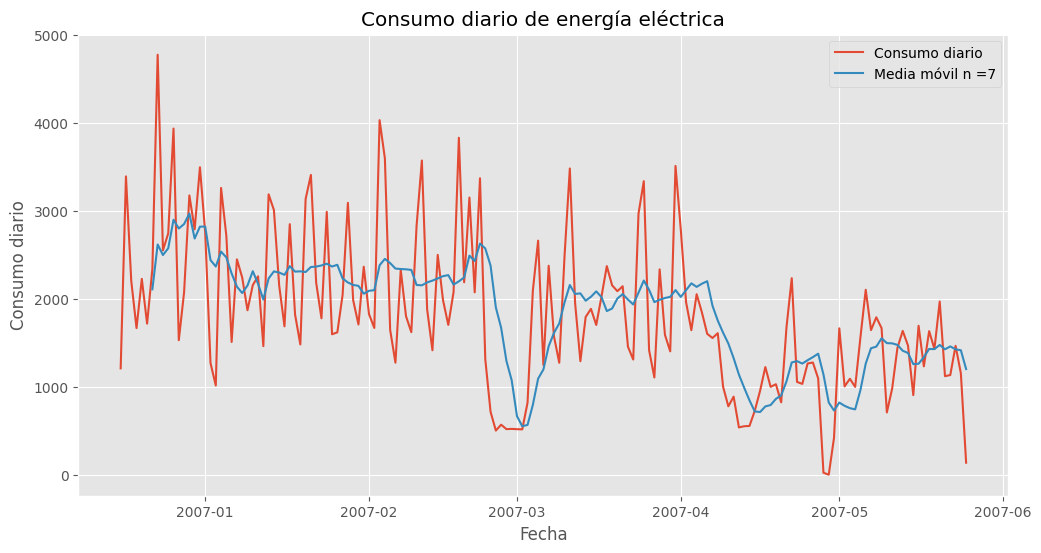

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values, label='Consumo diario')
plt.plot(daily_data.index, mmovil, label='Media móvil n =7')
plt.title('Consumo diario de energía eléctrica')
plt.xlabel('Fecha')
plt.ylabel('Consumo diario')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
power=daily_data.values

Continua con el modelo de series de tiempo y posteriormente haz lo mismo pero con los datos simulados.

In [26]:
# Estacionalidad
est = power - mmovil
est

array([            nan,             nan,             nan,             nan,
                   nan,             nan,  2.33714286e+02,  2.15658943e+03,
        5.32794286e+01,  1.69345429e+02,  1.03634743e+03, -1.26943286e+03,
       -7.76414000e+02,  2.06332286e+02,  1.04682857e+02,  6.74693429e+02,
       -7.13391429e+01, -1.17041086e+03, -1.35206343e+03,  7.23755429e+02,
        2.43568571e+02, -7.78428286e+02,  3.10324571e+02,  1.76585143e+02,
       -2.81409143e+02, -1.58626857e+02,  8.52268571e+01, -5.29804286e+02,
        9.55937143e+02,  6.96911143e+02, -1.48986571e+02, -5.85167714e+02,
        4.77132286e+02, -4.87132000e+02, -8.30888857e+02,  8.29986286e+02,
        1.04645257e+03, -1.84860571e+02, -6.00748286e+02,  5.89442000e+02,
       -7.69908286e+02, -7.67927714e+02, -1.86162000e+02,  9.05264000e+02,
       -1.74014571e+02, -4.38903143e+02,  3.06208286e+02, -2.65414571e+02,
       -4.29547714e+02,  1.64877400e+03,  1.14274400e+03, -7.59718286e+02,
       -1.06947286e+03, -

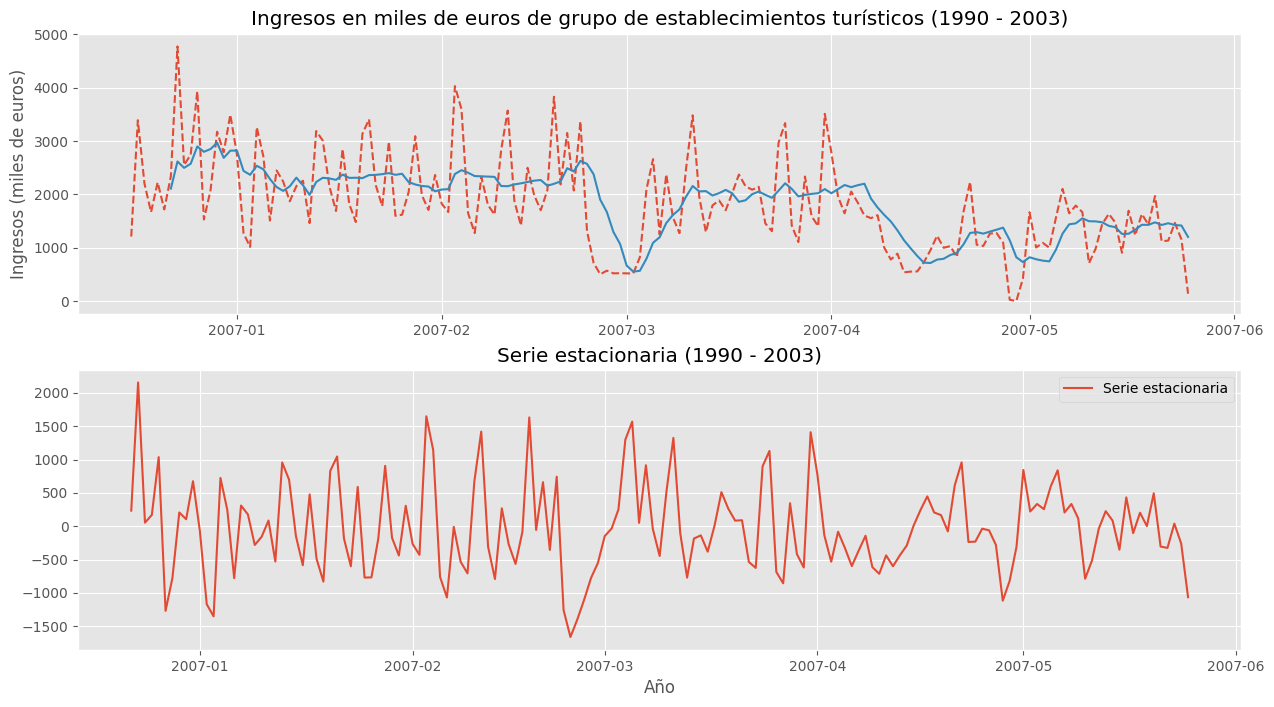

In [27]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(daily_data.index,power, '--', label='Ingresos')
plt.plot(daily_data.index,mmovil, label='Media móvil n =3')
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.ylabel('Ingresos (miles de euros)')
plt.subplot(212)
plt.plot(daily_data.index,est, '-',label='Serie estacionaria')
plt.title('Serie estacionaria (1990 - 2003)')
plt.xlabel('Año')
plt.legend()
plt.show()

## Descomposición

In [28]:
import statsmodels.api as sm

# Replace 'freq' with 'period'
descomposicion = sm.tsa.seasonal_decompose(daily_data.values, model='additive', period=30)

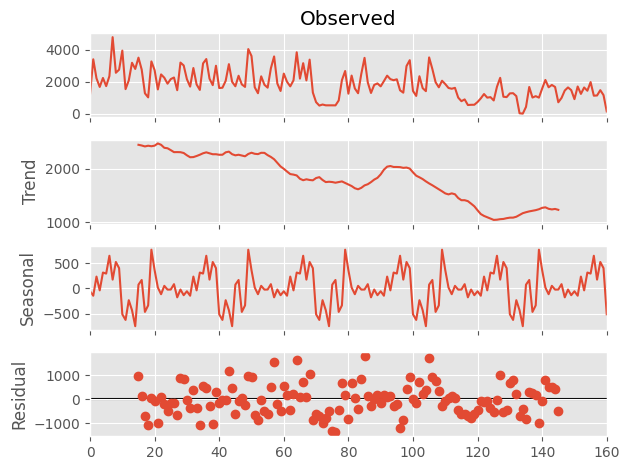

In [29]:
descomposicion.plot();

## Modelo ARIMA

In [30]:
# convertir daily_data en data frame

# Convertir daily_data a DataFrame
df_daily_data = pd.DataFrame({'Date': daily_data.index, 'Global_active_power': daily_data.values})
print(df_daily_data.head())

         Date  Global_active_power
0  2006-12-16             1209.176
1  2006-12-17             3390.460
2  2006-12-18             2203.826
3  2006-12-19             1666.194
4  2006-12-20             2225.748


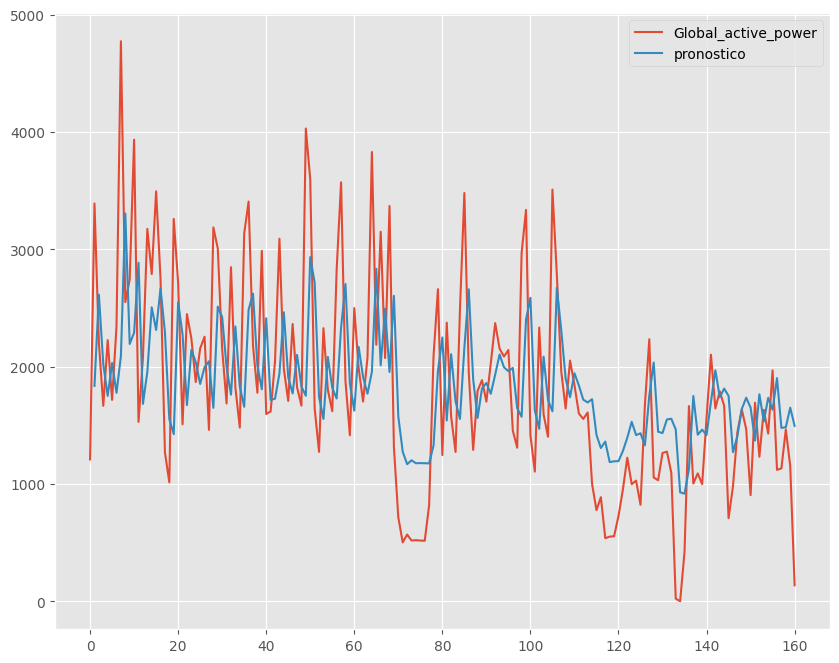

In [31]:
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(df_daily_data['Global_active_power'].iloc[1:], order=(1,0,0))
resultados = modelo.fit()
df_daily_data['pronostico'] = resultados.fittedvalues
plot = df_daily_data[['Global_active_power', 'pronostico']].plot(figsize=(10, 8));


In [32]:
# Drop the first row containing NaN if present
df_daily_data.dropna(inplace=True)
rmse_arima = mean_squared_error(
    df_daily_data['Global_active_power'], df_daily_data['pronostico'], squared=False
)
print(f"El error cuadrático medio del modelo ARIMA es: {rmse_arima}")

El error cuadrático medio del modelo ARIMA es: 769.7988928148426


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
# Análisis preliminar
# Revisamos estadísticas clave de consumo de energía
mean_consumption = df['Global_active_power'].mean()  # Media
std_consumption = df['Global_active_power'].std()    # Desviación estándar
print(f"Media del consumo de energía: {mean_consumption} kW")
print(f"Desviación estándar del consumo de energía: {std_consumption} kW")

Media del consumo de energía: 1.305536234962955 kW
Desviación estándar del consumo de energía: 1.2534049648878915 kW


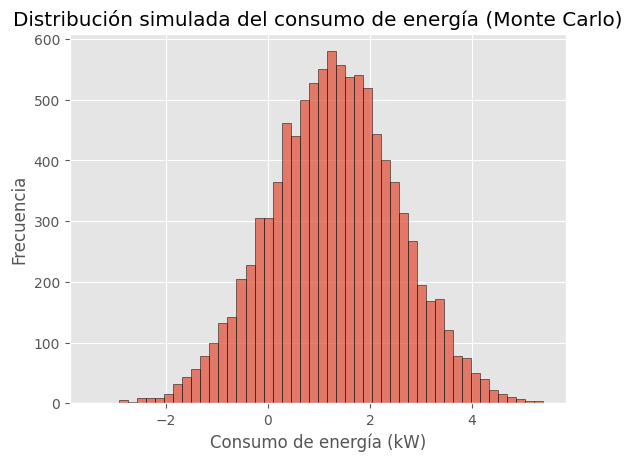

In [34]:
# Definir la simulación Monte Carlo
# Vamos a simular 10000 escenarios de consumo de energía futura
num_simulations = 10000
# Simulamos escenarios de consumo basado en una distribución normal
simulated_consumption = np.random.normal(loc=mean_consumption, scale=std_consumption, size=num_simulations)

# Visualizar los resultados
plt.hist(simulated_consumption, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución simulada del consumo de energía (Monte Carlo)')
plt.xlabel('Consumo de energía (kW)')
plt.ylabel('Frecuencia')
plt.show()

In [37]:
# dataset con los datos simulados, convierte en dataset y coloca fechas, Empezar desde el día siguiente al último del dataset original

# Find the last date in the original dataset
last_date = df['Date'].max()

# Create a list of dates starting from the day after the last date
dates = [last_date + timedelta(days=i) for i in range(1, len(simulated_consumption) + 1)]

# Create a DataFrame with the simulated data and dates
df_simulated = pd.DataFrame({'Date': dates, 'Global_active_power': simulated_consumption})

# Print the simulated dataset with dates
print(df_simulated)

# Concatenate the original and simulated datasets if needed
# df_combined = pd.concat([df_daily_data, df_simulated], ignore_index=True)

           Date  Global_active_power
0    2007-05-26             2.487173
1    2007-05-27             1.587986
2    2007-05-28             1.107347
3    2007-05-29             0.685270
4    2007-05-30             0.468027
...         ...                  ...
9995 2034-10-06             1.379194
9996 2034-10-07             0.654478
9997 2034-10-08             1.629220
9998 2034-10-09             1.810041
9999 2034-10-10             1.215536

[10000 rows x 2 columns]


In [38]:
# prompt: cambiar el nombre de la columna simulated_data por Global_active_power

# ... (Your existing code)

# Rename the column 'simulated_data' to 'Global_active_power'
# in df_simulated if it exists.
if 'simulated_data' in df_simulated.columns:
  df_simulated.rename(columns={'simulated_data': 'Global_active_power'}, inplace=True)

# ... (Rest of your code)

In [39]:
# prompt: concatenar las dos bases de datos

# Concatenate the original and simulated datasets
df_combined = pd.concat([df_daily_data, df_simulated], ignore_index=True)

# ... (Your existing code)

# Rename the column 'simulated_data' to 'Global_active_power'
# in df_simulated if it exists.
if 'simulated_data' in df_simulated.columns:
  df_simulated.rename(columns={'simulated_data': 'Global_active_power'}, inplace=True)

# ... (Rest of your code)

In [40]:
df_combined

,Date,Global_active_power,pronostico
0,2006-12-17,3390.460000,1836.039323
1,2006-12-18,2203.826000,2613.799791
2,2006-12-19,1666.194000,2020.062826
3,2006-12-20,2225.748000,1751.056551
4,2006-12-21,1716.624000,2031.031584
...,...,...,...
10155,2034-10-06 00:00:00,1.379194,NaN
10156,2034-10-07 00:00:00,0.654478,NaN
10157,2034-10-08 00:00:00,1.629220,NaN
10158,2034-10-09 00:00:00,1.810041,NaN


         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  
MAE: 0.025838930356817183
RMSE: 0.04036849910904765


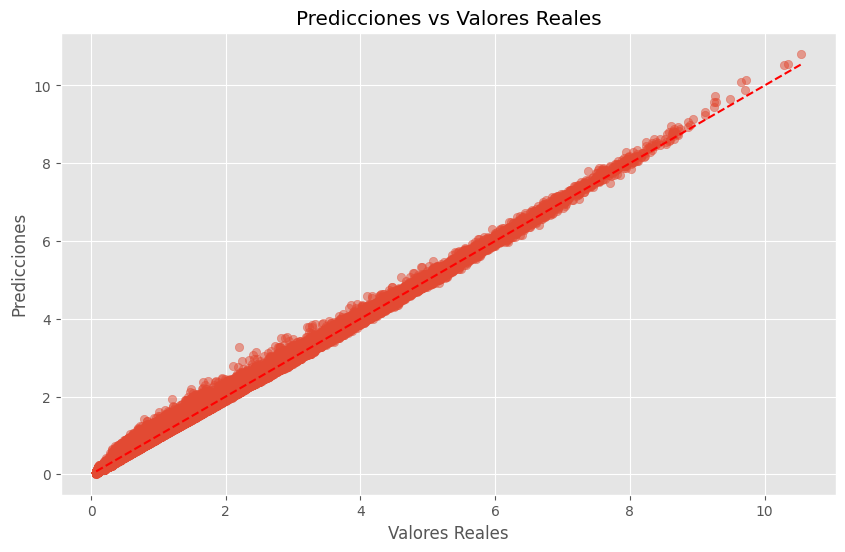

In [41]:
#Según los datos originales modelo de predicción, regresión lineal
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)

# Mostrar primeras filas para entender los datos
print(df.head())

# Convertir las columnas de fecha y hora a un solo campo de tipo datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df = df.drop(['Date', 'Time'], axis=1)  # Eliminar las columnas originales de fecha y hora

# Convertir las columnas numéricas a tipo float y manejar valores faltantes
for col in df.columns:
    if col != 'Datetime':
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convertir a float
df = df.dropna()  # Eliminar filas con valores NaN

# Seleccionar variables independientes (X) y la variable dependiente (y)
X = df.drop(['Global_active_power', 'Datetime'], axis=1)
y = df['Global_active_power']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

# Visualización de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

In [42]:
#Uniión del data seulado y datos originales
from datetime import timedelta

# Abrir el archivo original
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)

# Mostrar las primeras filas del dataset original
print("Dataset original:")
print(df.head())

# Encontrar la última fecha del dataset original
last_date = pd.to_datetime(df['Date'], format='%d/%m/%Y').max()

simulated_consumption = [x * 0.001 for x in range(10000)]  # datos simulados de ejemplo

# Crear una lista de fechas empezando desde el día siguiente a la última fecha
dates = [last_date + timedelta(days=i) for i in range(1, len(simulated_consumption) + 1)]

# Crear un DataFrame con los datos simulados y las fechas correspondientes
df_simulated = pd.DataFrame({
    'Date': dates,
    'Global_active_power': simulated_consumption
})

# Mostrar las primeras filas del dataset simulado
print("Dataset simulado:")
print(df_simulated.head())

# Concatenar el dataset original con el dataset simulado
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # Asegurar que las fechas estén en el mismo formato
df_combined = pd.concat([df[['Date', 'Global_active_power']], df_simulated], ignore_index=True)

# Mostrar las primeras filas del dataset combinado
print("Dataset combinado:")
print(df_combined.head())

# Guardar el dataset combinado en un archivo CSV
df_combined.to_csv('dataset_combinado.csv', index=False)


Dataset original:
         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  
Dataset simulado:
        Date  Global_active_power
0 2010-11-27                0.000
1 2010-11-28             

In [43]:

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)

# Mostrar las primeras filas del dataset original
print("Dataset original:")
print(df.head())

# Encontrar la última fecha del dataset original
last_date = pd.to_datetime(df['Date'], format='%d/%m/%Y').max()

simulated_consumption = [x * 0.001 for x in range(10000)]  # datos simulados de ejemplo

# Crear una lista de fechas empezando desde el día siguiente a la última fecha
dates = [last_date + timedelta(days=i) for i in range(1, len(simulated_consumption) + 1)]

# Crear un DataFrame con los datos simulados y las fechas correspondientes
df_simulated = pd.DataFrame({
    'Date': dates,
    'Global_active_power': simulated_consumption
})

# Mostrar las primeras filas del dataset simulado
print("Dataset simulado:")
print(df_simulated.head())

# Concatenar el dataset original con el dataset simulado
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # Asegurar que las fechas estén en el mismo formato
df_combined = pd.concat([df[['Date', 'Global_active_power']], df_simulated], ignore_index=True)

# Mostrar las primeras filas del dataset combinado
print("Dataset combinado:")
print(df_combined.head())

# Guardar el dataset combinado en un archivo CSV
df_combined.to_csv('dataset_combinado.csv', index=False)


Dataset original:
         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  
Dataset simulado:
        Date  Global_active_power
0 2010-11-27                0.000
1 2010-11-28             

Mean Squared Error (MSE): 1.1795683585948773
R-squared (R2): 0.0354614786145363


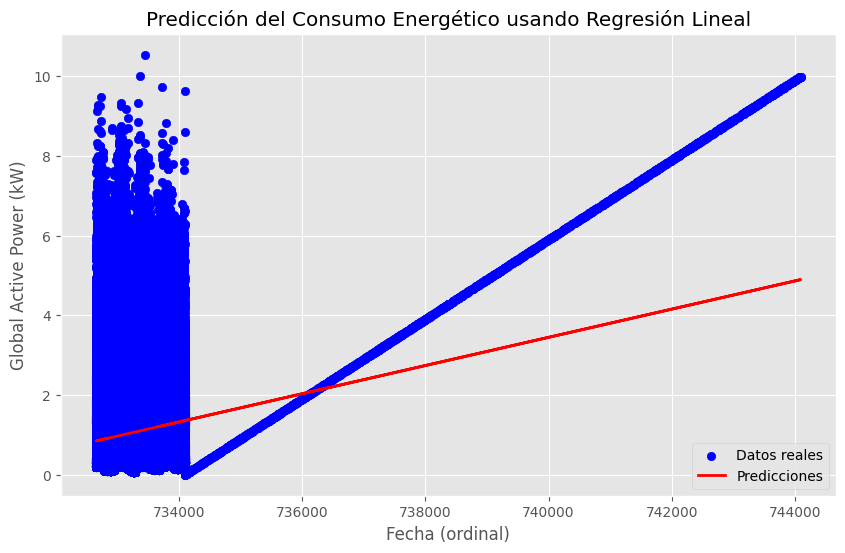

Fecha: 2038-04-13, Predicción Global Active Power: 4.8984 kW
Fecha: 2038-04-14, Predicción Global Active Power: 4.8987 kW
Fecha: 2038-04-15, Predicción Global Active Power: 4.8991 kW
Fecha: 2038-04-16, Predicción Global Active Power: 4.8994 kW
Fecha: 2038-04-17, Predicción Global Active Power: 4.8998 kW
Fecha: 2038-04-18, Predicción Global Active Power: 4.9002 kW
Fecha: 2038-04-19, Predicción Global Active Power: 4.9005 kW
Fecha: 2038-04-20, Predicción Global Active Power: 4.9009 kW
Fecha: 2038-04-21, Predicción Global Active Power: 4.9012 kW
Fecha: 2038-04-22, Predicción Global Active Power: 4.9016 kW
Fecha: 2038-04-23, Predicción Global Active Power: 4.9019 kW
Fecha: 2038-04-24, Predicción Global Active Power: 4.9023 kW
Fecha: 2038-04-25, Predicción Global Active Power: 4.9026 kW
Fecha: 2038-04-26, Predicción Global Active Power: 4.9030 kW
Fecha: 2038-04-27, Predicción Global Active Power: 4.9033 kW
Fecha: 2038-04-28, Predicción Global Active Power: 4.9037 kW
Fecha: 2038-04-29, Predi

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
# Cargar el dataset combinado
df_combined = pd.read_csv('dataset_combinado.csv')

# Asegurar que la columna 'Date' sea de tipo datetime
df_combined['Date'] = pd.to_datetime(df_combined['Date'])

# Reemplazar los valores no numéricos ('?') por NaN
df_combined.replace('?', np.nan, inplace=True)

# Convertir las columnas relevantes a numéricas (si corresponde)
df_combined['Global_active_power'] = pd.to_numeric(df_combined['Global_active_power'], errors='coerce')

# Eliminar las filas con valores faltantes
df_combined.dropna(subset=['Global_active_power'], inplace=True)

# Crear una nueva columna numérica para la fecha (ordinal)
df_combined['Date_ordinal'] = df_combined['Date'].map(pd.Timestamp.toordinal)

# Seleccionar las características (fecha ordinal) y la variable objetivo (Global_active_power)
X = df_combined[['Date_ordinal']]  # Característica (fecha en formato numérico)
y = df_combined['Global_active_power']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Visualización de los resultados
plt.figure(figsize=(10, 6))

# Datos reales vs predicciones
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')

plt.title('Predicción del Consumo Energético usando Regresión Lineal')
plt.xlabel('Fecha (ordinal)')
plt.ylabel('Global Active Power (kW)')
plt.legend()

plt.show()

# Predicciones futuras (opcional)
futuras_fechas = pd.date_range(df_combined['Date'].max(), periods=30, freq='D')  # 30 días futuros
futuras_fechas_ordinal = futuras_fechas.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

# Hacer predicciones para los días futuros
predicciones_futuras = model.predict(futuras_fechas_ordinal)

# Mostrar las fechas futuras con sus predicciones
for fecha, prediccion in zip(futuras_fechas, predicciones_futuras):
    print(f"Fecha: {fecha.date()}, Predicción Global Active Power: {prediccion:.4f} kW")


In [47]:
print(f"Error cuadratico medio (MSE): {mse}")

Error cuadratico medio (MSE): 1.1795683585948773


Un MSE de 1.1796 indica que, en promedio, el modelo tiene un error de alrededor de 1.1796 kW al intentar predecir el consumo de energía, sin embargo, el valor no es alto, pero al no estar cercano a 0 indica que el modelo no está capturando adecuadamente la variabilidad de los datos, como se observa en la gráfica, las predicciones están muy lejos de acuerdo a los datos reales en gran parte de todo el grafico.

Es probable que al tener unos datos de consumo tan variado, no se captura adecuadamente a traves de un modelo lineal simple.

Los datos simulados en este caso no parecen haber contribuido de manera significativa y posiblemente han introducido un sesgo en el modelo, provocando que las predicciones sigan una línea lineal simple que no captura la variabilidad de los datos reales.Sin embargo, las dos lineas tienden a ser ascendente y con ello se puede adaptar una idea.